In [20]:
import sys
import os
import torch
from torch import dtype
import numpy as np
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path+"\\GAN")
from gan import *
import seaborn as sns
import matplotlib.pyplot as plt
from torchvision import transforms, datasets

dtype = float
device = torch.device("cpu")

In [21]:
BATCH_SIZE = 128
LEARNING_RATE = 0.0002
LATENT_DIM = 100

In [26]:
#MNIST dataset
def mnist_load():
    transform = transforms.Compose([transforms.ToTensor(),
                                    transforms.Normalize((.5), (.5)),
                                    transforms.Lambda(image2vec)])
    return datasets.MNIST(root='./dataset', train=True, transform=transform, download=True)


def image2vec(image):
    return image.view(image.size(0), 784)


def vec2image(vector):
    return vector.view(vector.size(0), 1, 28, 28)

In [27]:
data = mnist_load()
data_loader = torch.utils.data.DataLoader(data, batch_size=BATCH_SIZE, shuffle=True)

In [28]:
advNet = GAN(LATENT_DIM,device)

In [ ]:
advNet.train(data_loader, batch_size=BATCH_SIZE, epochs=200)

Epoch 0: Discriminator loss: 0.3762995824654664 | Generator loss: 4.296645958731169
Epoch 1: Discriminator loss: 0.3327813576668628 | Generator loss: 4.053948852998107
Epoch 2: Discriminator loss: 0.4283573718658134 | Generator loss: 2.086999021232255
Epoch 3: Discriminator loss: 0.3416394603246056 | Generator loss: 2.651141822719371
Epoch 4: Discriminator loss: 0.30377158770429047 | Generator loss: 2.7161714418102174
Epoch 5: Discriminator loss: 0.21195236170914636 | Generator loss: 3.4601254125139604
Epoch 6: Discriminator loss: 0.25262668568378827 | Generator loss: 2.9751778780016056
Epoch 7: Discriminator loss: 0.26711692926344843 | Generator loss: 2.5580148102123856
Epoch 8: Discriminator loss: 0.3012114454751838 | Generator loss: 2.5813735540487617
Epoch 9: Discriminator loss: 0.277206132851684 | Generator loss: 2.6471720283219553
Epoch 10: Discriminator loss: 0.31911567771739796 | Generator loss: 2.42350338135701
Epoch 11: Discriminator loss: 0.2992269531496044 | Generator loss:

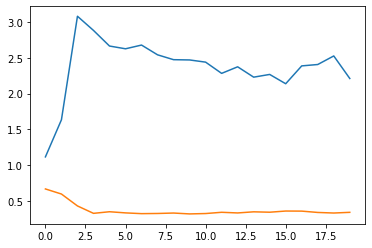

In [11]:
plt.plot(advNet.history['Generator'])
plt.plot(advNet.history['Discriminator'])
plt.show()

In [12]:
pred = advNet.generate(1)

In [13]:
pred = pred.cpu().detach().numpy()

In [14]:
pred

array([[-2.85339952e-01,  3.19607526e-01,  6.19073249e-02,
         2.76096702e-01, -5.06323539e-02,  2.39073321e-01,
         3.24824363e-01, -4.71103549e-01, -1.21585233e-02,
        -5.81378900e-02, -1.01498775e-01, -1.61108878e-02,
         3.31047654e-01, -1.70220714e-02,  1.74090058e-01,
        -3.24426591e-01, -2.55180866e-01, -2.68338155e-03,
         2.99584478e-01, -1.39910609e-01,  1.93491668e-01,
        -3.64252329e-01, -8.60573724e-03, -1.66836068e-01,
         2.52005786e-01,  7.96122774e-02, -3.34701717e-01,
        -2.13831700e-02, -2.48990491e-01,  1.31115317e-01,
         3.67180407e-01,  1.14885882e-01, -1.75320908e-01,
         2.05534950e-01,  2.65293211e-01, -3.69793363e-02,
         2.17710227e-01, -7.32887238e-02,  2.71310031e-01,
         4.63616580e-01, -1.58282608e-01,  1.19389251e-01,
         1.42423347e-01, -5.47971845e-01, -1.69427752e-01,
        -4.16602612e-01, -1.60218060e-01,  5.42876422e-01,
         1.38691545e-01,  1.32113159e-01,  4.04944330e-0